# Basic_stats

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('sales_data_with_discounts.csv')

# Select numerical columns
numeric_cols = [
    'Volume',
    'Avg Price',
    'Total Sales Value',
    'Discount Rate (%)',
    'Discount Amount',
    'Net Sales Value'
]

# Compute statistics
summary = df[numeric_cols].agg(['mean', 'median', 'std']).T
summary['mode'] = df[numeric_cols].mode().iloc[0]
summary.rename(columns={
    'mean':   'Mean',
    'median': 'Median',
    'std':    'Std Dev',
    'mode':   'Mode'
}, inplace=True)

print(summary)


                           Mean       Median       Std Dev          Mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801


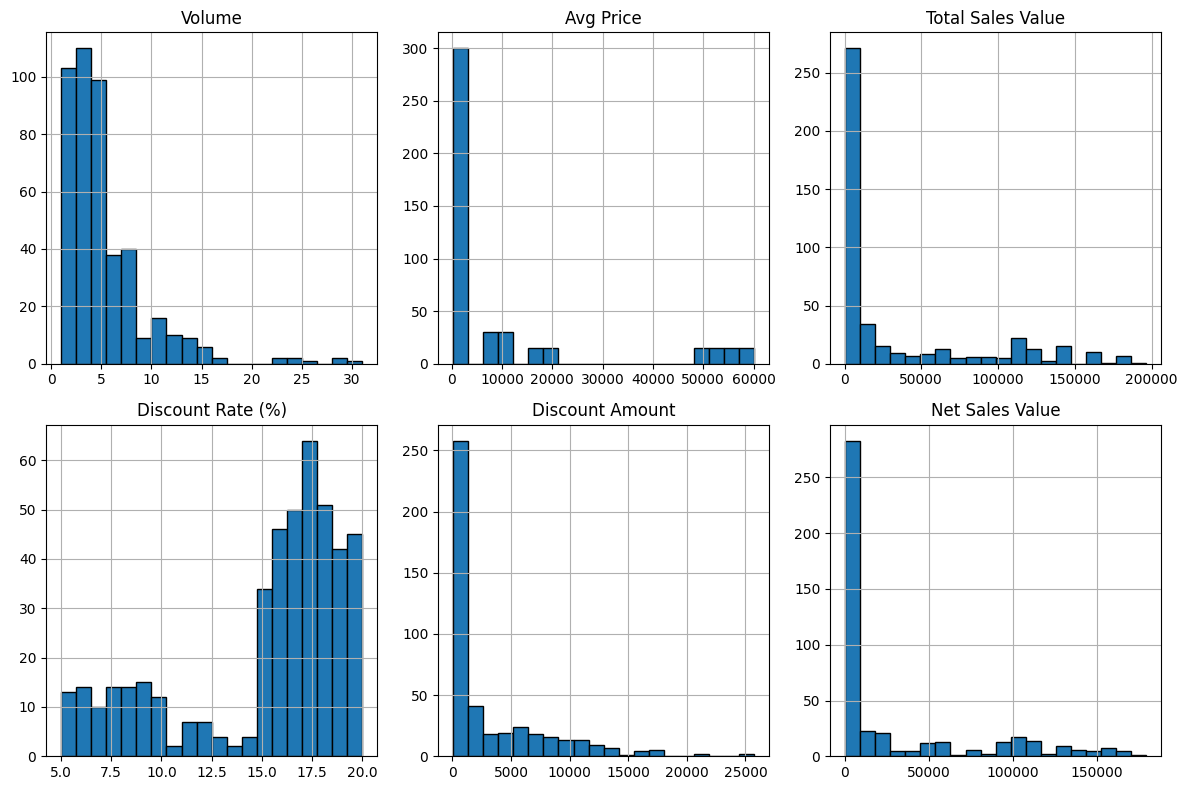

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
df[['Volume', 'Avg Price', 'Total Sales Value', 
    'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']].hist(
    bins=20, figsize=(12, 8), layout=(2, 3), edgecolor='black'
)
plt.tight_layout()
plt.show()


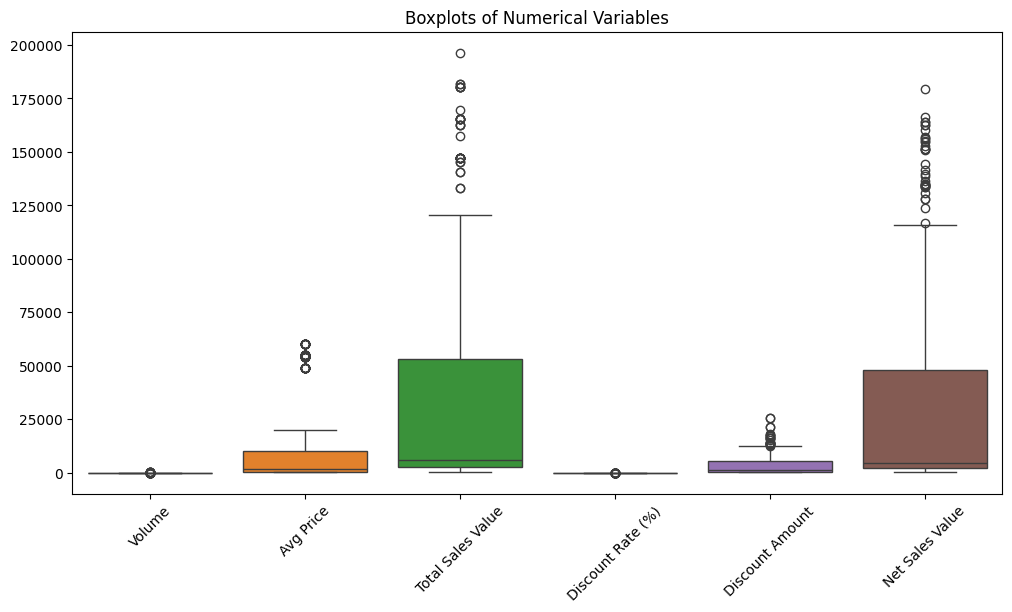

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[['Volume', 'Avg Price', 'Total Sales Value',
             'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
)
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Variables')
plt.show()


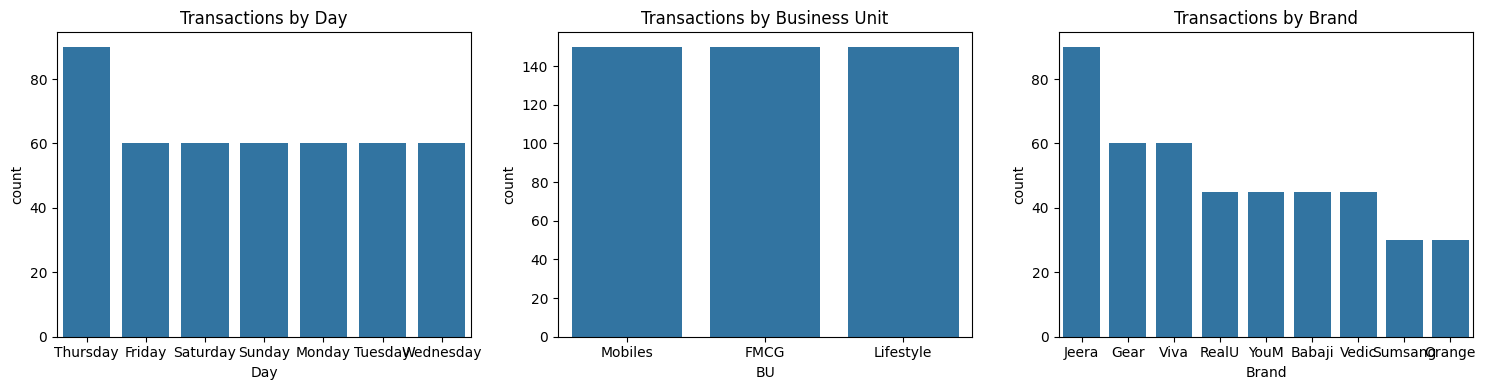

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x='Day', data=df, ax=axes[0]).set_title('Transactions by Day')
sns.countplot(x='BU', order=df['BU'].value_counts().index, data=df, ax=axes[1]).set_title('Transactions by Business Unit')
sns.countplot(x='Brand', order=df['Brand'].value_counts().index, data=df, ax=axes[2])
axes[2].set_title('Transactions by Brand')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('sales_data_with_discounts.csv')

# Columns to standardize
numeric_cols = [
    'Volume',
    'Avg Price',
    'Total Sales Value',
    'Discount Rate (%)',
    'Discount Amount',
    'Net Sales Value'
]

# Fit scaler and transform
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])

# Create DataFrame of standardized features
df_scaled = pd.DataFrame(
    scaled_values,
    columns=numeric_cols
)


IndexError: index 3 is out of bounds for axis 1 with size 3

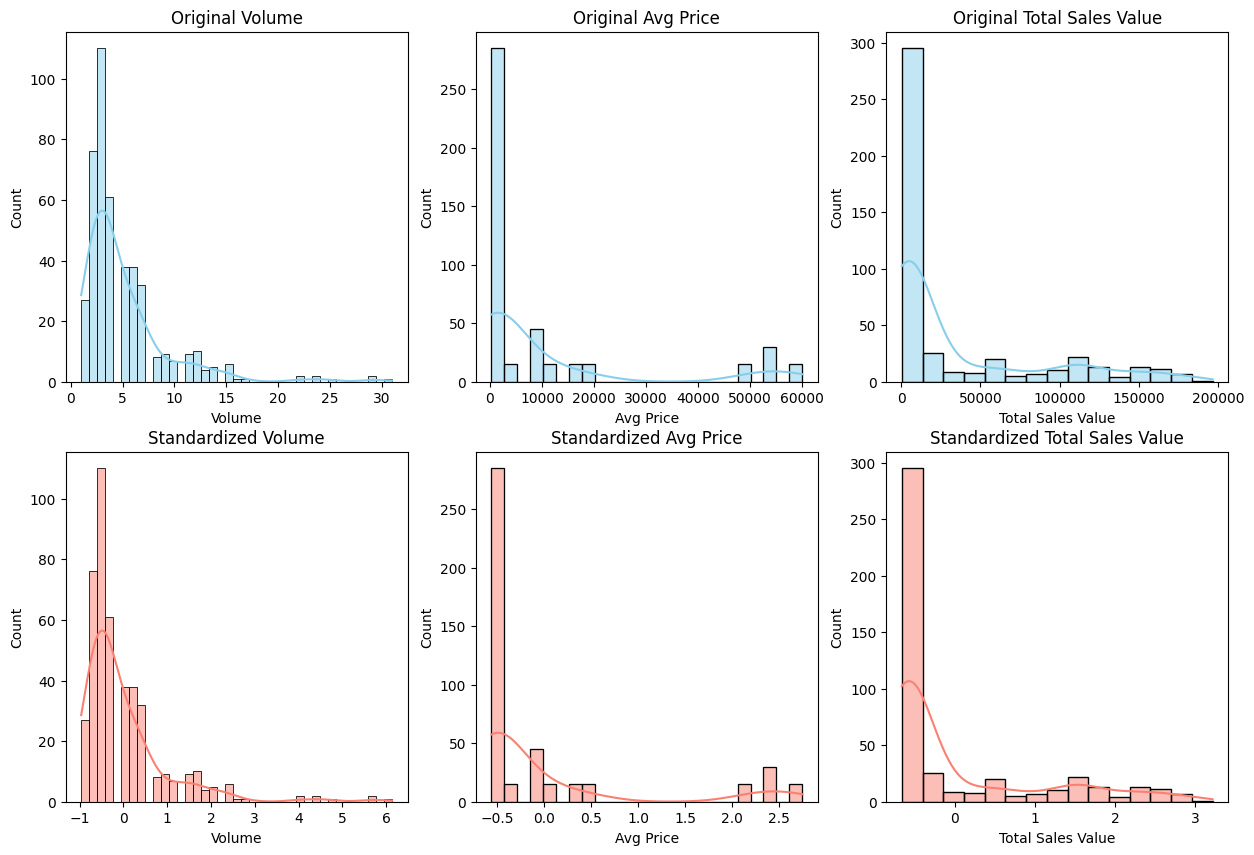

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, col in enumerate(numeric_cols):
    # Original
    ax_orig = axes[0, idx]
    sns.histplot(df[col], kde=True, ax=ax_orig, color='skyblue')
    ax_orig.set_title(f'Original {col}')
    
    # Standardized
    ax_std = axes[1, idx]
    sns.histplot(df_scaled[col], kde=True, ax=ax_std, color='salmon')
    ax_std.set_title(f'Standardized {col}')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Load the raw dataset
df = pd.read_csv('sales_data_with_discounts.csv')

# Columns to one-hot encode
cat_cols = ['Day', 'BU', 'Brand']

# Apply one-hot encoding
df_dummies = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)

# View a sample of the transformed DataFrame
df_dummies.head(5)


,Date,SKU,City,Volume,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,...,BU_Mobiles,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,01-04-2021,M01,C,15,RU-10,12100,181500,11.654820,21153.498820,160346.501180,...,1,0,0,0,0,1,0,0,0,0
1,01-04-2021,M02,C,10,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,...,1,0,0,0,0,1,0,0,0,0
2,01-04-2021,M03,C,7,YM-99,16100,112700,9.456886,10657.910157,102042.089843,...,1,0,0,0,0,0,0,0,0,1
3,01-04-2021,M04,C,6,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,...,1,0,0,0,0,0,0,0,0,1
4,01-04-2021,M05,C,3,YM-98,8100,24300,17.995663,4372.946230,19927.053770,...,1,0,0,0,0,0,0,0,0,1
